<a href="https://colab.research.google.com/github/ShionFujimori/covid19-analysis/blob/master/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configuration & Downloading Data
1. Set up the kaggle API
2. Download and unzip the datasets

In [7]:
# setup the kaggle API
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp 'drive/My Drive/Colab Notebooks/kaggle/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674/kaggle-1.5.6-cp36-none-any.whl
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [8]:
# load datasets (kaggle: Novel-Corona-Virus-2019-dataset managed by SRK)
import zipfile

!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -f covid_19_data.csv

with zipfile.ZipFile('./covid_19_data.csv.zip', 'r') as zip_ref:
  zip_ref.extractall('./covid_19_data')

covid_19_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


## Overall Data Info
1. Read the csv file and observe the overall data
2. Observe the daily transition of COVID-19 cases

In [9]:
# obtain data using Pandas
import pandas as pd

data = pd.read_csv("./covid_19_data/covid_19_data.csv", index_col="SNo", parse_dates=["ObservationDate"])
print(f"Data shape: {data.shape}\n")

data

Data shape: (21543, 7)



,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21539,2020-05-04,Wyoming,US,2020-05-05 02:32:34,596.0,7.0,0.0
21540,2020-05-04,Xinjiang,Mainland China,2020-05-05 02:32:34,76.0,3.0,73.0
21541,2020-05-04,Yukon,Canada,2020-05-05 02:32:34,11.0,0.0,0.0


In [10]:
# summary function (not very useful here)
data.describe()

,Confirmed,Deaths,Recovered
count,21543.000000,21543.000000,21543.000000
mean,4078.755791,259.551734,1111.196305
std,18788.782457,1776.347640,7750.116630
min,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000
50%,134.000000,1.000000,3.000000
75%,935.000000,13.000000,105.000000
max,318953.000000,29079.000000,187180.000000


In [11]:
# obtain ObservationDate vs (Confirmed/Deaths/Recovered) data
confirmed_vs_date = data.groupby("ObservationDate").Confirmed.sum()
deaths_vs_date = data.groupby("ObservationDate").Deaths.sum()
recovered_vs_date = data.groupby("ObservationDate").Recovered.sum()

daily_data = pd.concat([confirmed_vs_date, deaths_vs_date, recovered_vs_date], axis=1)
daily_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-04-30,3256846.0,233388.0,1014753.0
2020-05-01,3343777.0,238650.0,1053327.0
2020-05-02,3427343.0,243808.0,1093112.0


## Visualize the data
1. Cumulative Confirmed Cases vs Observation Date
2. Cumulative Deaths vs Observation Date
3. Cumulative Recovered Cases vs Observation Date

In [0]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

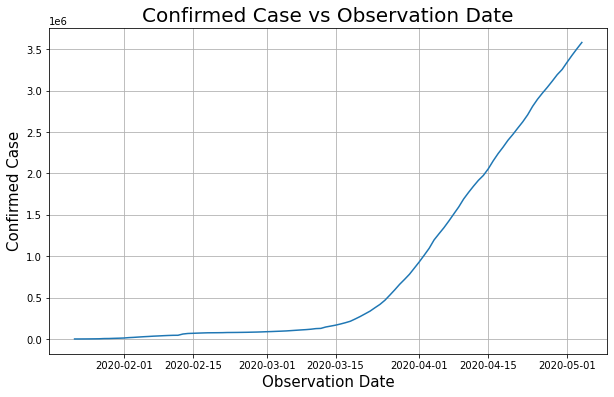

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Confirmed)
plt.grid()
plt.title("Confirmed Case vs Observation Date", fontsize=20)
plt.ylabel("Confirmed Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

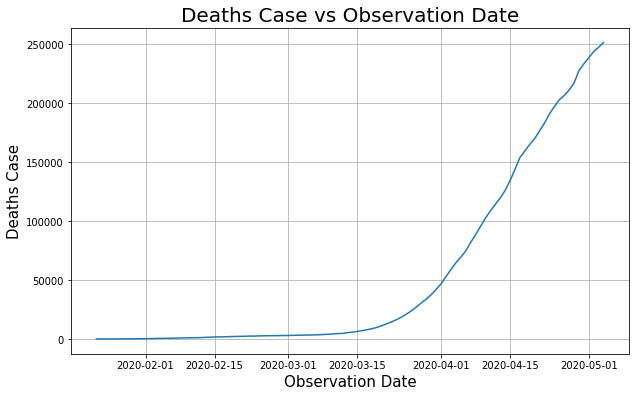

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Deaths)
plt.grid()
plt.title("Deaths Case vs Observation Date", fontsize=20)
plt.ylabel("Deaths Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

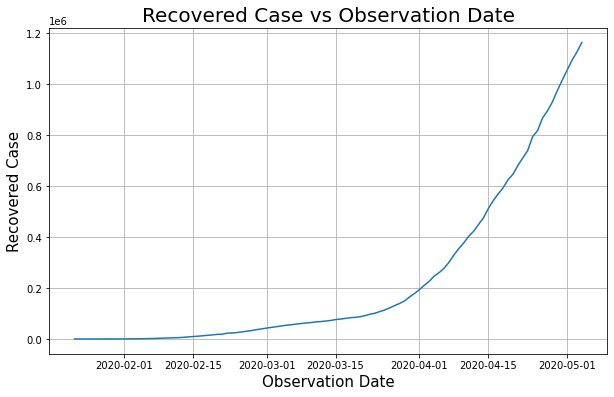

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Recovered)
plt.grid()
plt.title("Recovered Case vs Observation Date", fontsize=20)
plt.ylabel("Recovered Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

## Daily transition of COVID-19 cases
1. Group the data by observed date and country
2. China -- daily transition
3. USA -- daily transition
4. Japan -- daily transition

In [37]:
# Group the data by ObservationDate and Country/Region

daily_country_data = data.groupby(["ObservationDate", "Country/Region"]) \
                    [["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

daily_country_data

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Hong Kong,0.0,0.0,0.0
1,2020-01-22,Japan,2.0,0.0,0.0
2,2020-01-22,Macau,1.0,0.0,0.0
3,2020-01-22,Mainland China,547.0,17.0,28.0
4,2020-01-22,South Korea,1.0,0.0,0.0
...,...,...,...,...,...
11854,2020-05-04,West Bank and Gaza,362.0,2.0,102.0
11855,2020-05-04,Western Sahara,6.0,0.0,5.0
11856,2020-05-04,Yemen,12.0,2.0,1.0
11857,2020-05-04,Zambia,137.0,3.0,78.0


In [31]:
# Example 1: China -- daily transition
daily_country_data.query('`Country/Region` == "Mainland China"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,Mainland China,547.0,17.0,28.0
2020-01-23,Mainland China,639.0,18.0,30.0
2020-01-24,Mainland China,916.0,26.0,36.0
2020-01-25,Mainland China,1399.0,42.0,39.0
2020-01-26,Mainland China,2062.0,56.0,49.0
...,...,...,...,...
2020-04-30,Mainland China,82874.0,4633.0,77642.0
2020-05-01,Mainland China,82875.0,4633.0,77679.0
2020-05-02,Mainland China,82875.0,4633.0,77685.0


In [32]:
# Example 2: US -- daily transition
daily_country_data.query('`Country/Region` == "US"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,US,1.0,0.0,0.0
2020-01-23,US,1.0,0.0,0.0
2020-01-24,US,2.0,0.0,0.0
2020-01-25,US,2.0,0.0,0.0
2020-01-26,US,5.0,0.0,0.0
...,...,...,...,...
2020-04-30,US,1069424.0,62996.0,153947.0
2020-05-01,US,1103461.0,64943.0,164015.0
2020-05-02,US,1132539.0,66369.0,175382.0


In [33]:
# Example 3: Japan -- daily transition
daily_country_data.query('`Country/Region` == "Japan"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,Japan,2.0,0.0,0.0
2020-01-23,Japan,1.0,0.0,0.0
2020-01-24,Japan,2.0,0.0,0.0
2020-01-25,Japan,2.0,0.0,0.0
2020-01-26,Japan,4.0,0.0,1.0
...,...,...,...,...
2020-04-30,Japan,14088.0,430.0,2460.0
2020-05-01,Japan,14305.0,455.0,2975.0
2020-05-02,Japan,14571.0,474.0,3205.0


## Choropleth Graph
1. The Spread of COVID-19 Cases Across World
2. The Spread of COVID-19 Deaths Across World
3. The COVID-19 Recovery Rate Across World

In [0]:
# plotly: interactive graphing library for Python
import plotly.offline as py
import plotly.express as px

# numpy lirary
import numpy as np

# obtain a copy of daily_country_data
choropleth_data = daily_country_data.copy()

# fix ObservationDate datatype from Timesatmp to String
choropleth_data.ObservationDate = choropleth_data.ObservationDate.astype(str)

# take logarithms (Confirmed, Deaths, Recovered)
choropleth_data["Confirmed (logarithmic scale)"] = np.log1p(choropleth_data.Confirmed)
choropleth_data["Deaths (logarithmic scale)"] = np.log1p(choropleth_data.Deaths)
choropleth_data["Recovered (logarithmic scale)"] = np.log1p(choropleth_data.Recovered)

# calculate the recovery rate
choropleth_data["RecoveryRate"] = (choropleth_data.Recovered / (choropleth_data.Confirmed+1e-6)).round(3)

In [92]:
# Plotting a Running Map for observing the spread of COVID-19 Confirmed Cases

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Confirmed (logarithmic scale)", 
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Cases Across World')

py.offline.iplot(fig)

In [93]:
# Plotting a Running Map for observing the spread of COVID-19 deaths

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Deaths (logarithmic scale)",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Deaths Across World')

py.offline.iplot(fig)

In [94]:
# Plotting a Running Map for observing the COVID-19 recovery rate

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="RecoveryRate",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The COVID-19 Recovery Rate Across World')

py.offline.iplot(fig)